# Open Ocean
# Open Earth Fundation
---------------------------------------------------------------------------------------------------------------------
Authors: Margaux Filippi & Maureen Fonseca

---------------------------------------------------------------------------------------------------------------------

<h1> Step 2: calculate different metrics for each modulating factor </h1>
    
This notebook is the second part of the Step1_Curate_IUCN_RedList.ipynb

<h2> Modulating Factor 4: Vulnerability of Species  <h2>

<h2> Data needed for this project </h2>

The data was output by `Step1_Curate_IUCN_RedList.ipynb` and can be found under [IUCN_RedList](https://drive.google.com/drive/folders/1waEAtfQwErhBKH3GkTHZXIlbadzH3HYu?usp=share_link) under a temporary folder that accompagnies the GitHub repository: 

`Ocean Program > data > data_processed > ACMC_IUCN_RedList`

### Analyzing UICN data for marine species in the Eastern Tropical Pacific.

In [1]:
import geopandas as gpd

/Users/maureenfonseca/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
import glob

In [4]:
from shapely.geometry import Polygon, Point

In [5]:
import fiona; #help(fiona.open)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import timeit

In [8]:
from netCDF4 import Dataset
import cmocean
import geopandas as gpd
from matplotlib.ticker import LinearLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

OEF functions

In [9]:
from marinebiodiversity_utils import *

<h1> 2.1. Load data </h1>

<h2> 2.1.1 Get the conservation area</h2>

Mostly for plotting.

<h3> Coordinates for Cocos Island </h3>

Cocos Island is located at 05°31′41″N; 87°03′40″W

In [10]:
Cocos_lat = 5+31/60+41/3600
Cocos_lon = -(87+3/60+40/3600)
Cocos = Point(Cocos_lon, Cocos_lat)

<h3> Import entire AMMB and PNIC </h3>

In [11]:
ACMC = gpd.read_file('../../Geospatial_ACMC/ACMC.shp')
AMMB = gpd.read_file('../../Geospatial_ACMC/AMMB.shp')
PNIC = gpd.read_file('../../Geospatial_ACMC/PNIC.shp')

Inspect the Coordinate Reference Systems (CRS).

In [12]:
AMMB.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
PNIC.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
AMMB_WGS84 = AMMB.to_crs(crs=4326)
PNIC_WGS84 = PNIC.to_crs(crs=4326)
ACMC = ACMC.set_crs(epsg=4326, allow_override=True)

Get area information.

In [16]:
print("Area, PNIC:")
print("{:0.2f}".format(PNIC_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(PNIC_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

print("\nArea, AMMB:")
print("{:0.2f}".format(AMMB_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(AMMB_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

print("\nTotal Area, ACMC:")
print("{:0.2f}".format(AMMB_WGS84.area.item() + PNIC_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(AMMB_WGS84.to_crs(crs=31970).area.item()*10**(-6) + PNIC_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

Area, PNIC:
4.47 sqdeg.
54,799.50 sqkm in CRS 31970.

Area, AMMB:
8.66 sqdeg.
106,243.90 sqkm in CRS 31970.

Total Area, ACMC:
13.13 sqdeg.
161,043.41 sqkm in CRS 31970.


/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_52320/2915868912.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(PNIC_WGS84.area.item()) + " sqdeg.")
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_52320/2915868912.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(AMMB_WGS84.area.item()) + " sqdeg.")
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_52320/2915868912.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(AMMB_WGS84.area.item() + PNIC_WGS84.area.item()) + " sqdeg.")

<h2> 2.1.2 Get the species data </h2>

This is the outcome from `AMMB_IUCN_step1_curatedata.ipynb`.

In [17]:
df = gpd.read_file('../../ACMC_IUCN_data/gdf_ACMC_IUCN_range_status_filtered.shp') 

In [18]:
df.head()

,index,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,redlistCat,scientific,geometry
0,13,1504292,177964,Ctenochaetus marginatus,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,Least Concern,Ctenochaetus marginatus,"MULTIPOLYGON (((173.90343 3.44131, 173.90535 3..."
1,62,1604964,180245,Holothuria kefersteinii,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,Data Deficient,Holothuria kefersteinii,"MULTIPOLYGON (((-117.10683 32.44577, -117.1034..."
2,69,1614313,180318,Holothuria imitans,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,Least Concern,Holothuria imitans,"MULTIPOLYGON (((132.11722 -2.12133, 132.11264 ..."
3,76,1621878,180373,Isostichopus fuscus,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,Endangered,Isostichopus fuscus,"MULTIPOLYGON (((-114.81055 31.82298, -114.7885..."
4,95,1735660,183294,Strongylura exilis,1,1,1,IUCN,2018,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,None,None,Least Concern,Strongylura exilis,"MULTIPOLYGON (((-91.24865 -0.67985, -91.24889 ..."


With the first version data from Margaux, the data set had 164 unique species, now:

In [20]:
print("There are " + str(len(df)) + " unique species in this dataset.")

There are 640 unique species in this dataset.


In [21]:
print("The columns are:")
print(df.columns)

The columns are:
Index(['index', 'ASSESSMENT', 'ID_NO', 'BINOMIAL', 'PRESENCE', 'ORIGIN',
       'SEASONAL', 'COMPILER', 'YEAR', 'CITATION', 'LEGEND', 'SUBSPECIES',
       'SUBPOP', 'DIST_COMM', 'ISLAND', 'TAX_COMM', 'redlistCat', 'scientific',
       'geometry'],
      dtype='object')


Super annoying ESRI note: the column headers are cropped to 10 characters.

`redlistCat` = `redlistCategory`

`scientific` = `scientificName`

<h1> 2.2. Preliminary calculations </h1> 

In [27]:
area_of_conservation = ACMC.geometry.item()

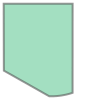

In [28]:
area_of_conservation

***We have the following conservation statuses:***

In [23]:
print("There are the following conservation statuses:")
print(df.redlistCat.unique())

There are the following conservation statuses:
['Least Concern' 'Vulnerable' 'Data Deficient' 'Near Threatened'
 'Endangered' 'Critically Endangered']


In [24]:
for status in df.redlistCat.unique():
    print("There are " + str(len(df[df.redlistCat==status])) + \
          " species with the status " + status)

There are 531 species with the status Least Concern
There are 46 species with the status Vulnerable
There are 34 species with the status Data Deficient
There are 10 species with the status Near Threatened
There are 16 species with the status Endangered
There are 3 species with the status Critically Endangered


Text(0.5, 1.0, 'Plot 1: Species Status')

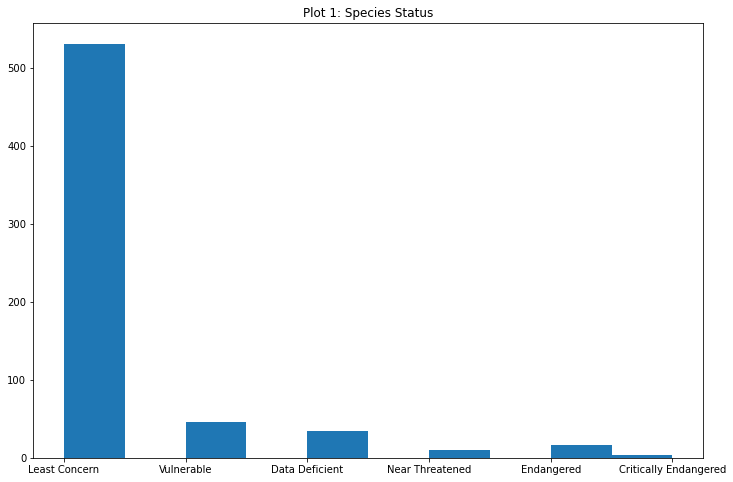

In [37]:
plt.figure(figsize=(12,8))
plt.hist(df.redlistCat)
plt.title('Plot 1: Species Status')

In [26]:
print("The species with the status Critically Endangered are :")
print(df[df.redlistCat=='Critically Endangered'].BINOMIAL)

The species with the status Critically Endangered are :
566    Carcharhinus longimanus
573     Eretmochelys imbricata
631            Pristis pristis
Name: BINOMIAL, dtype: object


- *Carcharhinus longimanus* is Oceanic whitetip shark
- *Eretmochelys imbricata* is Hawksbill sea turtle
- *Pristis pristis* is Largetooth sawfish

TO BE COMPLETED!